In [1]:
import geopandas as gpd

In [2]:
roads = gpd.read_file('SH_Road.shp')
roads.head()

,ID,DISTNAME,ROADNUMBER,CLASSIFICA,DRAWLEVEL,OVERRIDE,FEATCODE,geometry
0,ED8E3F1E-3ADA-40A6-8D96-B9CE5246135F,NaN,NaN,Local Road,0,F,15760,"LINESTRING Z (248668.970 387486.850 0.000, 248..."
1,77845DFB-ECFF-4DD4-A484-506845DF2435,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248833.550 387822.120 0.000, 248..."
2,5E0208DE-B110-4963-BAA2-1DDB71FAF6BD,NaN,NaN,Local Road,0,F,15760,"LINESTRING Z (248833.550 387822.120 0.000, 248..."
3,08461678-B973-45ED-93CA-B3BABD98BC75,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248753.190 387361.020 0.000, 248..."
4,2BE50484-C47E-46A4-8FDB-BE3BA4CBE107,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248813.120 387329.190 0.000, 248..."


In [3]:
selected_ids = ['131324F8-FBCD-4389-B15E-B4EF4021D593',
                '1D5F1288-107D-485D-8CF2-C1117D328C9B',
                'FE5D98A4-BCB2-4016-84CD-045B94858A3F']
selected_ids = ['0807C27F-5B78-4265-8E5B-32DE499D846A']
selected_roads = roads[roads['ID'].isin(selected_ids)]
selected_roads

,ID,DISTNAME,ROADNUMBER,CLASSIFICA,DRAWLEVEL,OVERRIDE,FEATCODE,geometry
39196,0807C27F-5B78-4265-8E5B-32DE499D846A,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (256493.830 325710.310 0.000, 256..."


<Axes: >

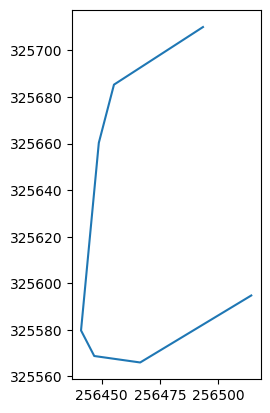

In [4]:
selected_roads.plot()

In [5]:
search_margin = 20

In [6]:
selected_roads.bounds

,minx,miny,maxx,maxy
39196,256441.08,325566.0,256514.58,325710.31


In [7]:
all_bounds = (min(selected_roads.bounds['minx'])-search_margin,
              min(selected_roads.bounds['miny'])-search_margin,
              max(selected_roads.bounds['maxx'])+search_margin,
              max(selected_roads.bounds['maxy'])+search_margin)
all_bounds

(256421.08000000002, 325546.0, 256534.58000000002, 325730.31)

In [8]:
max_extent = max((all_bounds[2]-all_bounds[0],
                  all_bounds[3]-all_bounds[1]))
centre = (0.5*(all_bounds[2]+all_bounds[0]),
          0.5*(all_bounds[3]+all_bounds[1]))
print(centre,max_extent)

(256477.83000000002, 325638.155) 184.30999999999767


In [9]:
from scipy.stats.qmc import PoissonDisk

In [10]:
import numpy as np

In [11]:
radius = 5.0
num_samples = (max_extent/radius)**2
sampler = PoissonDisk(d=2, radius=radius/max_extent)
scaled_samples = max_extent*(sampler.random(num_samples)-0.5)
num_samples = np.size(scaled_samples,0)
samples = scaled_samples + np.tile(np.array(centre),(num_samples,1))
print(samples,num_samples)

[[256399.58456153 325651.13904583]
 [256397.43089145 325660.44008969]
 [256407.6666277  325650.23940406]
 ...
 [256569.4048977  325546.64247103]
 [256562.61899551 325546.13527578]
 [256521.39278312 325591.8118874 ]] 829


In [12]:
from shapely import Point, LineString

In [13]:
sample_points = [Point(samples[ii,0],samples[ii,1]) for ii in range(num_samples)]

In [14]:
sample_points = gpd.GeoSeries(sample_points,crs=roads.crs)

<Axes: >

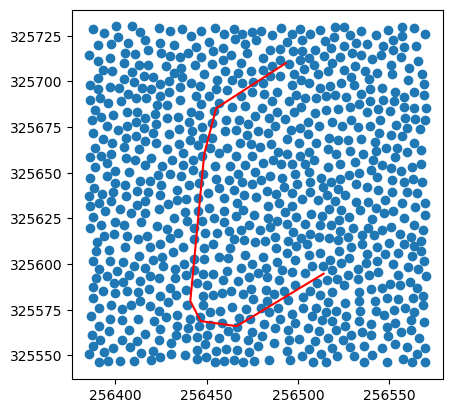

In [15]:
ax = sample_points.plot()
selected_roads.plot(ax=ax,color='red')

In [16]:
sample_distances = [min(selected_roads.distance(p)) for p in sample_points]
sample_distances

[48.047594909618105,
 51.06956869612146,
 39.91669566969987,
 46.977453515737444,
 42.57569043728549,
 41.64677975213255,
 52.73933284685631,
 51.87848456146501,
 56.327692620029495,
 40.426130555484846,
 53.69929763768381,
 47.74701216946452,
 55.015589639200535,
 43.001679066469976,
 37.147887091552654,
 34.56941965140776,
 29.880095798304264,
 33.4686635581115,
 28.449021691840173,
 59.57342875076911,
 57.14367471483393,
 48.66135458620208,
 58.1934717825734,
 51.23716446609396,
 45.16621620028508,
 40.216564700112606,
 52.85869021742585,
 37.94066948580204,
 45.097671896319575,
 60.796690821361125,
 58.7142556340441,
 51.02033306531131,
 62.18171173010808,
 24.32407532151618,
 31.853841161935115,
 28.32138422593818,
 47.033272781890865,
 50.184880997189445,
 38.564361935679706,
 55.97338482986032,
 44.02718917215145,
 43.5259940831076,
 49.04508395019287,
 55.63978469601509,
 35.87168271178397,
 38.83609252462821,
 44.787655099452984,
 37.16895534379798,
 41.542625189610156,
 35.71

<Axes: >

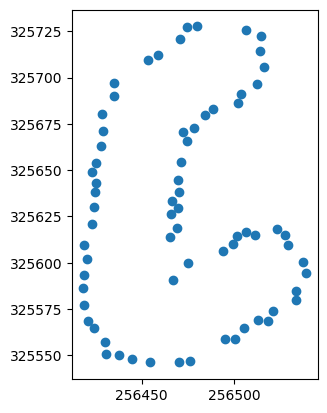

In [17]:
flags = [d < search_margin+0.95*radius and d > search_margin for d in sample_distances]
edge_points = sample_points[flags]
edge_points.plot()

<Axes: >

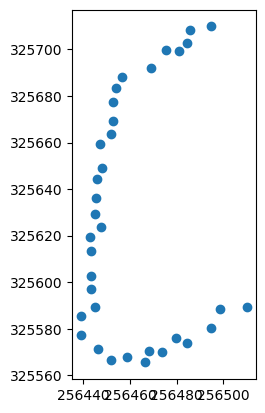

In [18]:
flags = [d < 0.6*radius for d in sample_distances]
road_points = sample_points[flags]
road_points.plot()

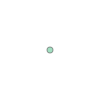

In [19]:
top_arg = np.argmax(edge_points.y)
top_point = edge_points.iloc[top_arg]
top_point

In [20]:
from shapely.ops import nearest_points

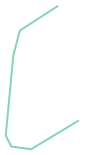

In [21]:
selected_roads.unary_union

In [22]:
top_nearest = gpd.GeoSeries(nearest_points(top_point, selected_roads.unary_union))

<Axes: >

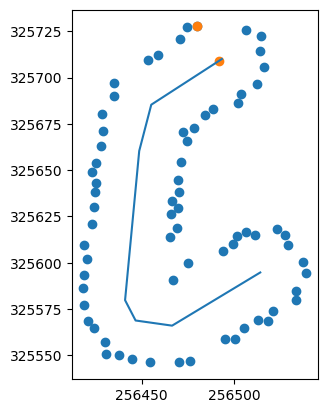

In [23]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)

In [24]:
opposite_point = Point(top_point.x + 2*(top_nearest[1].x - top_point.x),
                       top_point.y + 2*(top_nearest[1].y - top_point.y))

<Axes: >

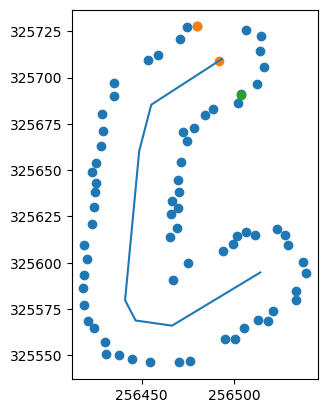

In [25]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)
gpd.GeoSeries([opposite_point]).plot(ax=ax)

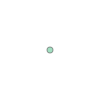

In [26]:
start_point = top_point
start_point

In [27]:
def opposing_point(first_point, overshoot=1.0):
    nearest_road = nearest_points(first_point, selected_roads.unary_union)[1]
    opposite_point = Point(first_point.x + (1.0+overshoot)*(nearest_road.x - first_point.x),
                           first_point.y + (1.0+overshoot)*(nearest_road.y - first_point.y))
    return opposite_point

opposing_point(start_point).xy

(array('d', [256503.84665929078]), array('d', [325690.4575003045]))

In [28]:
gdf_edge_points = gpd.GeoDataFrame(geometry=edge_points)
gdf_edge_points['visited'] = False

In [29]:
def closest_unvisited_edge_point_name(target_point):
    unvisited_points = gdf_edge_points[gdf_edge_points['visited']==False]
    ix_closest = np.argmin(unvisited_points.distance(target_point))
    closest_point_name = unvisited_points.iloc[ix_closest].name
    return closest_point_name
closest_point_name = closest_unvisited_edge_point_name(opposite_point)

<Axes: >

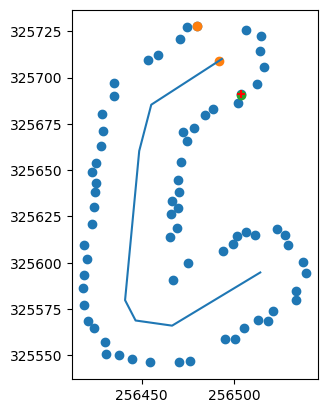

In [30]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)
gpd.GeoSeries([opposite_point]).plot(ax=ax)
gdf_edge_points[gdf_edge_points.index==closest_point_name].plot(ax=ax,color='r',marker='+')

In [31]:
start_point = gdf_edge_points.iloc[top_arg]
gdf_edge_points.loc[start_point.name,'visited'] = True

In [32]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
tour = [start_point.geometry]
for ii in range(len(gdf_edge_points)):
    opposite_point = opposing_point(current_point.geometry)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256479.811 325727.571)>,
 <POINT (256503.629 325690.993)>,
 <POINT (256501.97 325686.203)>,
 <POINT (256474.604 325727.156)>,
 <POINT (256470.84 325720.596)>,
 <POINT (256488.745 325683.025)>,
 <POINT (256484.183 325679.753)>,
 <POINT (256459 325711.991)>,
 <POINT (256453.198 325709.335)>,
 <POINT (256478.331 325672.972)>,
 <POINT (256472.329 325670.566)>,
 <POINT (256428.543 325680.035)>,
 <POINT (256429.322 325671.382)>,
 <POINT (256471.028 325654.396)>,
 <POINT (256469.589 325644.775)>,
 <POINT (256423.196 325648.83)>,
 <POINT (256425.334 325653.745)>,
 <POINT (256470.229 325638.092)>,
 <POINT (256466.508 325633.423)>,
 <POINT (256424.674 325637.92)>,
 <POINT (256425.238 325643.196)>,
 <POINT (256469.713 325629.416)>,
 <POINT (256465.952 325626.097)>,
 <POINT (256424.049 325630.148)>,
 <POINT (256423.029 325620.865)>,
 <POINT (256465.17 325613.868)>,
 <POINT (256468.985 325618.839)>,
 <POINT (256419.118 325609.409)>,
 <POINT (256420.383 325602.045)>,
 <POINT (256467.202 325

In [33]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
start_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
tour = [Point(start_road.x,start_road.y),start_point.geometry]
for ii in range(len(gdf_edge_points)):
    nearest_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
    tour.append(Point(nearest_road.x,nearest_road.y))
    opposite_point = opposing_point(current_point.geometry,overshoot=0.75)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256491.829 325709.014)>,
 <POINT (256479.811 325727.571)>,
 <POINT (256491.829 325709.014)>,
 <POINT (256503.629 325690.993)>,
 <POINT (256501.97 325686.203)>,
 <POINT (256488.565 325706.9)>,
 <POINT (256474.604 325727.156)>,
 <POINT (256470.84 325720.596)>,
 <POINT (256482.318 325702.856)>,
 <POINT (256488.745 325683.025)>,
 <POINT (256484.183 325679.753)>,
 <POINT (256473.095 325696.889)>,
 <POINT (256459 325711.991)>,
 <POINT (256453.198 325709.335)>,
 <POINT (256464.746 325691.487)>,
 <POINT (256478.331 325672.972)>,
 <POINT (256472.329 325670.566)>,
 <POINT (256452.715 325675.676)>,
 <POINT (256428.543 325680.035)>,
 <POINT (256429.322 325671.382)>,
 <POINT (256450.181 325665.948)>,
 <POINT (256471.028 325654.396)>,
 <POINT (256469.589 325644.775)>,
 <POINT (256447.443 325646.874)>,
 <POINT (256425.334 325653.745)>,
 <POINT (256423.196 325648.83)>,
 <POINT (256447.411 325646.534)>,
 <POINT (256470.229 325638.092)>,
 <POINT (256466.508 325633.423)>,
 <POINT (256446.349 325

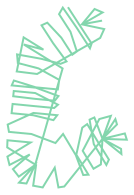

In [34]:
tour_line = LineString(tour)
tour_line

In [35]:
tour_line.length

2121.6617531535494

<Axes: >

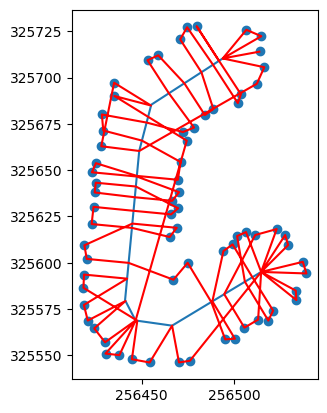

In [36]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
gdf_tour = gpd.GeoDataFrame(geometry=[tour_line])
gdf_tour.plot(ax=ax,color='red')

In [37]:
gdf_tour.crs = 'EPSG:27700'
gdf_tour_gps = gdf_tour.to_crs('EPSG:4326')

In [38]:
gdf_tour.to_file('tour.shp')

In [39]:
gdf_tour_gps.to_file('tour_gps.shp')

In [40]:
from pymavlink.mavwp import MAVWPLoader
from pymavlink.dialects.v20.common import MAVLink_mission_item_int_message, MAV_CMD_NAV_TAKEOFF, MAV_CMD_NAV_LAND

In [41]:
gdf_tour_gps['geometry'][0].coords[0]

(-4.1305552781650245, 52.80977716043519)

In [42]:
alt = 20
alt_frame = 3
wp = MAVWPLoader()
takeoff_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_TAKEOFF, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            0, # int(wp.x*1.0e7),
            0, # int(wp.y*1.0e7),
            alt) # wp.z
wp.add(takeoff_cmd)
wp.add(takeoff_cmd)

In [43]:
for pt in gdf_tour_gps['geometry'][0].coords:
    wp.add_latlonalt(pt[1],pt[0],20.0)

In [44]:
land_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_LAND, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            gdf_tour_gps['geometry'][0].coords[0][1], # int(wp.x*1.0e7), lat
            gdf_tour_gps['geometry'][0].coords[0][0], # int(wp.y*1.0e7), lon
            0) # wp.z
wp.add(land_cmd)

In [45]:
    
file_name = 'mission.txt'
wp.save(file_name)